## Analyze A/B Test Results


## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [3]:
# Importing data and checking for top 5 rows using the header
df = pd.read_csv('ab_data.csv')
df.head(5)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [4]:
# total number of rows are equivalent to length of dataset
print ("Number of rows in dataset:",len(df))

Number of rows in dataset: 294478


c. The number of unique users in the dataset.

In [5]:
# Total number of unique users can be counted using nunique function
print ("Number of unique users:",df.nunique()['user_id'])

Number of unique users: 290584


d. The proportion of users converted.

In [6]:
# Number of users converted is mean of column converted

print ("Propotion of users converted:",df.converted.mean())

Propotion of users converted: 0.11965919355605512


e. The number of times the `new_page` and `treatment` don't line up.

##### 2 conditions satisfy scenario when new page and treatment group don't line up <br>
$$cond\ _1 \ : Treatment \ group \  with \ landing \ page \ as \ Old page. $$
$$cond\ _2 \ : Control \ group\  with\  landing \ page \ as \ New\  page. $$

In [7]:
# Calculating condition 1 and condition 2 instances
cond_1 = df.query("group == 'treatment' and landing_page == 'old_page' ")
cond_2 = df.query("group == 'control' and landing_page == 'new_page' ")

# Adding both counts to get the final number how many times the mismatch scenario occurs
event_count = len(cond_1)+ len(cond_2)
print ("Total mismatch events:",event_count)

Total mismatch events: 3893


f. Do any of the rows have missing values?

#### No missing data as all columns have same number of values.

In [8]:
#Checking dataframe info for missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
# Dropping the rows where mismatch occurs

df.drop(df.query("group == 'treatment' and landing_page == 'old_page' ").index, inplace = True)
df.drop(df.query("group == 'control' and landing_page == 'new_page' ").index, inplace = True)

In [10]:
#Confirming if the number of rows are removed 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [11]:
# For further analysis, saving the file as ab_data_cleaned)
df.to_csv('ab_data_cleaned.csv', index = False)

In [12]:
#Importing the cleaned file into new data frame (df2)
df2 = pd.read_csv('ab_data_cleaned.csv')

In [13]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [14]:
#Using nunique with column defined
print ("Number of unique user id:",df2.nunique()['user_id'])

Number of unique user id: 290584


b. There is one **user_id** repeated in **df2**.  What is it?

In [15]:
# Finding duplicated id
df2[df2.duplicated('user_id')]

,user_id,timestamp,group,landing_page,converted
2862,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [16]:
#Extracting all information related to the duplicated id using user id information extracted in previous step.
df2[df2['user_id']==773192]

,user_id,timestamp,group,landing_page,converted
1876,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2862,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [17]:
#removing the line from data frame by specyfing the index value under labels.
df2.drop(labels = 2862, axis = 0, inplace = True)

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [18]:
#Using mean since data is in 1 and 0.
prob_convert = df2.converted.mean()
print("Probability of individual converting is :", prob_convert)

Probability of individual converting is : 0.11959708724499628


b. Given that an individual was in the `control` group, what is the probability they converted?

In [19]:
#Calculating the control group mean by filtering data using query.
control_convert = df2.query('group =="control"').converted.mean()
print("Probability of control group converting is :", control_convert)

Probability of control group converting is : 0.1203863045004612


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [20]:
#Calculating the treatment group mean by filtering data using query.
treatment_convert = df2.query('group =="treatment"').converted.mean()
print("Probability of treatment group converting is :", treatment_convert)

Probability of treatment group converting is : 0.11880806551510564


In [21]:
# Calculating the difference between treatment and control group. This will be utilized later in analysis as actual difference.
obs_diff = treatment_convert - control_convert
obs_diff

-0.0015782389853555567

d. What is the probability that an individual received the new page?

In [22]:
# Calculating probability of landing on new page
prob_new_page = df2.query('landing_page== "new_page"')['user_id'].count()/df2.shape[0]
print("Probability of individual receiving new page is :", prob_new_page)

Probability of individual receiving new page is : 0.500061944223


e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**Answer**
- Based on analysis so far conversion rate for control group(12.03%) is higher than treatment group(11.88%). 
- Since we are not accounting for any factors (change aversion, novelty factors, duration etc), we cannot conclude which page is better at this point in analysis.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Answer**

$$ H_0:  p_{old} \geq p_{new} $$ <br>
$$ H_1: p_{old} < p_{new}$$


- H0(Null Hypothesis): New page has either same coversion rate or worse than old page. <br>
- H1(Alternative Hypothesis): New page has better conversion rate than old page.

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [23]:
# Calculating propotion of users that converted using new page
p_new = df2['converted'].mean()
print("Convert rate for p_new :", p_new)

Convert rate for p_new : 0.11959708724499628


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [24]:
# Calculating propotion of users that converted using old page
p_old = df2['converted'].mean()
print("Convert rate for p_old :", p_old)

Convert rate for p_old : 0.11959708724499628


c. What is $n_{new}$?

In [25]:
# number of users with new page
n_new = df2.query('landing_page == "new_page"').count()[0]
print("Number of users with new page :",n_new)

Number of users with new page : 145310


d. What is $n_{old}$?

In [26]:
# number of users with old page
n_old = df2.query('landing_page == "old_page"').count()[0]
print("Number of users with old page :",n_old)

Number of users with old page : 145274


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [27]:
# Using binomial distribution to find samples with probability p_new
new_page_converted =  np.random.binomial(1, p = p_new,size = n_new)
new_page_converted

array([0, 0, 0, ..., 0, 0, 0])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [28]:
# Using binomial distribution to find samples with probability p_old
old_page_converted =  np.random.binomial(1, p = p_old,size = n_old)
old_page_converted

array([0, 0, 0, ..., 0, 0, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [29]:
# Calculating the difference between mean of each scenarios probability
diffs = new_page_converted.mean() - old_page_converted.mean()
print("Difference between mean of each scenarios probability:",diffs)

Difference between mean of each scenarios probability: -0.000828133901523


h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [30]:
# Drawing samples and normalizing the values to probability by dividing with size of respective population
p_diffs = []

new_convert = np.random.binomial(n_new,p_new,10000)/n_new
old_convert = np.random.binomial(n_old,p_old,10000)/n_old
p_diffs = new_convert - old_convert

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

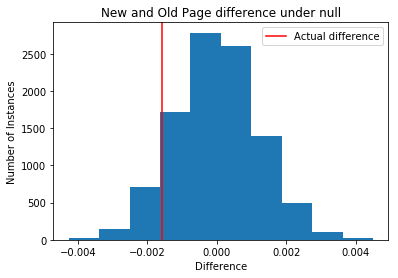

In [31]:
p_diffs = np.array(p_diffs)
plt.hist(p_diffs);
plt.title('New and Old Page difference under null');
plt.xlabel('Difference');
plt.ylabel('Number of Instances');
plt.axvline(obs_diff, color = 'red', label = "Actual difference");
plt.legend();

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [32]:
# Using obs_diff (actual difference) calculated in part 1 to compare with calculated p_diffs.
(obs_diff < p_diffs).mean()

0.90329999999999999

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

** Answer**
- Value calculated in part j is 'p-value". <br>
- Given the calculated p-value is high (.907) it suggests that we fail to reject the null-hypothesis i.e. conversion rate for new page is either same or worse than old page.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [33]:
import statsmodels.api as sm

convert_old = df2.query('landing_page == "old_page" and converted == 1').count()[0]
convert_new = df2.query('landing_page == "new_page" and converted == 1').count()[0]
n_old = df2.query('landing_page =="old_page"').count()[0]
n_new = df2.query('landing_page =="new_page"').count()[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [34]:
# Calculating z_score and p-value.
z_score, p_value = sm.stats.proportions_ztest(count = [convert_new,convert_old], nobs = [n_new,n_old], alternative ='larger' )
print ("z_score:",z_score)
print("p_value:",p_value)

z_score: -1.31092419842
p_value: 0.905058312759


In [35]:
from scipy.stats import norm

print("Singificance of z-score: ",norm.cdf(z_score))
# Tells us how significant our z-score is

#Assuming 95% confidence

print("Critical Value: ",norm.ppf(1-(0.05/2)))
# Tells us what our critical value at 95% confidence is

Singificance of z-score:  0.094941687241
Critical Value:  1.95996398454


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Answer**
- Since the z_score is lower than the critical value, we fail to reject the null.<br>
- Although p-values are slightly different but statistically the findings are inline with findings from j and k.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic Regression**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [36]:
#creating intercept column
df2['intercept'] = 1

#creating dummy variable using ab_page insted of treatment column name.

df2[['control','ab_page']] = pd.get_dummies(df2['group'])

In [37]:
#Dropping control column as we require ab_page only as per instructions in b.
df2.drop(labels=['control'], axis=1,inplace=True)
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [38]:
#import statsmodel
import statsmodels.api as sm

log_mod = sm.Logit(df2['converted'], df2[['intercept','ab_page']])
results = log_mod.fit()


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [39]:
#Display summary of results
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sat, 21 Jul 2018   Pseudo R-squ.:               8.077e-06
Time:                        21:33:30   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**Answer**
- **p-value** associated with ab_page is **0.19** <br>
- It is different from part II (**one-tailed** test) because this is a **two-tailed** test.<br>
- Despite of change in p-value, the value is still higher than 0.05 (alpha) and we **fail to reject the null**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Answer**
- So far we have not accounted for any other factors, so definitely it will be a good idea to add some value added additional factors such as duration of testing.<br>
- However we need to take into account if there are correlated errors or outliers introduced in the model due to these factors then r-squared value might deteriorate. <br>


g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [40]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [41]:
# Finding unique countries in dataset
countries_df['country'].unique()

array(['UK', 'US', 'CA'], dtype=object)

In [42]:
### Create the necessary dummy variables
df_new[['CA','US','UK']] = pd.get_dummies(df_new['country'])[['CA','US','UK']]

In [43]:
#confirming if the dummies inherit correct values by comparing dummy column values to country column
df_new.tail()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,US,UK
user_id,,,,,,,,,,
653118,US,2017-01-09 03:12:31.034796,control,old_page,0,1,0,0,1,0
878226,UK,2017-01-05 15:02:50.334962,control,old_page,0,1,0,0,0,1
799368,UK,2017-01-09 18:07:34.253935,control,old_page,0,1,0,0,0,1
655535,CA,2017-01-09 13:30:47.524512,treatment,new_page,0,1,1,1,0,0
934996,UK,2017-01-09 00:30:08.377677,control,old_page,0,1,0,0,0,1


In [44]:
### Fit Your Linear Model And Obtain the Results
log_mod_countries = sm.Logit(df_new['converted'],df_new[['intercept','US','UK']])
results_countries = log_mod_countries.fit()
results_countries.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Sat, 21 Jul 2018   Pseudo R-squ.:               1.521e-05
Time:                        21:33:32   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
US             0.0408      0.027      1.518      0.129      -0.012       0.093
UK             0.0507      0.028      1.786      0.074      -0.005       0.106
==============================================================================
"""

In [45]:
# Adding ab_page
log_mod_countries_2 = sm.Logit(df_new['converted'],df_new[['intercept','US','UK','ab_page']])
results_countries_2 = log_mod_countries_2.fit()
results_countries_2.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sat, 21 Jul 2018   Pseudo R-squ.:               2.323e-05
Time:                        21:33:34   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
US             0.0408      0.027      1.516      0.130      -0.012       0.093
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
==============================================================================
"""

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

Checking for interaction between page and country

In [48]:
# Creating new columns for interaction between page and country
df_new['US_ab_page'] = df_new['US'] * df_new['ab_page']
df_new['UK_ab_page'] = df_new['UK'] * df_new['ab_page']
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,US,UK,US_ab_page,UK_ab_page
user_id,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,0,1,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1,0,1,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,0,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,0,1,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,0,1,0,1


In [49]:
# Fit toLinear Model And Obtain the Results
log_mod_int = sm.Logit(df_new['converted'],df_new[['intercept','US','UK','ab_page','US_ab_page','UK_ab_page']])
results_int = log_mod_int.fit()
results_int.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Sat, 21 Jul 2018   Pseudo R-squ.:               3.482e-05
Time:                        21:38:16   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0040      0.036    -55.008      0.000      -2.075      -1.933
US             0.0175      0.038      0.465      0.642      -0.056       0.091
UK             0.0118      0.040      0.296      0.767      -0.066       0.090
ab_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
US_ab_page     0.0469      0.054      0.872      0.383      -0.059       0.152
UK_ab_page     0.0783      0.057      1.378      0.168      -0.033       0.190
==============================================================================
"""

**Result:** p-value is still higher than alpha, fail to reject null

<a id='conclusions'></a>
## Conclusions

- With change of methodology between part II and part III, p-value changed. But in either case, we fail to reject the null as value is still higher than alpha. <br>
- Based on this analysis, there is no practical significance in rolling out the new page over old page. Conversion rate for old page is better than new one. <br>
- Comparing users among different countries also doesn't show considerable difference in statistics. <br>



### Reference 

- Z-score calculations : http://knowledgetack.com/python/statsmodels/proportions_ztest/ 
- Numpy Documentation: https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.binomial.html
- Udacity Slack channel and Knowledge page
- Z-Score definition : http://www.statisticshowto.com/probability-and-statistics/z-score/
- Intercept: https://stats.stackexchange.com/questions/7948/when-is-it-ok-to-remove-the-intercept-in-a-linear-regression-model